# Pràctica 2

In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv', header=0, delimiter=',')
test_df =  pd.read_csv('test.csv', header=0, delimiter=',')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

### Característiques de les dades:
Les característiques de les dades de test i de train son iguals, execeptuant per la columna Survived ja que es la variable objectiu. Tenim entre el test i el train un total de 1309 files i 12 columnes diferents

### Descripció:
`PassengerID` : es la única variable que no té cap tipus d'efecte amb la variable objectiu

`Survived` : és la variable objectiu, pot ser (0 o 1):
- 1 = Survived
- 0 = Not Survived

`Pclass` (Passenger Class): l'estatus socioeconòmic del passatger i és una variable ordinal categòrica que té 3 valors únics (1, 2 o 3):
- 1 = Upper Class
- 2 = Middle Class
- 3 = Lower Class

`Name`, `Sex` and `Age`: son el que el seu nom indica

`SibSp`: nombre total de germans i cònjuge dels passatgers

`Parch`: nombre total de pares i fills dels passatgers

`Ticket`: número de bitllet del passatger

`Fare`: tarifa del passatger

`Cabin`: número de cabina del passatger

`Embarked`: port d'embarcament i és una variable categòrica que té 3 valors únics (C, Q o S):
- C = Cherbourg
- Q = Queenstown
- S = Southampton


### Tipus:
Categorical:
- `Pclass` (ordinal)
- `Name` (nominal)
- `Sex` (nominal)

Numerical:
- `Age` (continua)
- `Fare` (continua)
- `SibSp` (discreta)
- `Parch` (discreta)

Mixed:
- `Ticket` (numèrica i alfanumèrica)
- `Cabin` (alfanumèrica)

### Anàlisi de nulls

In [3]:
print("Dades Train")
print(train_df.info())

print("\nDades Test")
print(test_df.info())

Dades Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Dades Test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-

Del Train Data tenim:

- Age: 177 de 891 valors nuls (19.8% de nuls).
- Cabin: 687 de 891 nuls (77.1% de nuls).
- Embarked: 2 de 891 nuls.


Del Test Data tenim:

- Age: 86 de 418 nuls (20.5% de nuls).
- Cabin: 327 de 418 nuls (78.2% de nuls).
- Fare: 1 de 418 nuls.

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


D'aqui podrem observar que:

- La taxa de supervivencia es del 38.3%
- Més del 75% dels passatgers estan per sobre dels 38 anys
- Hi ha molta gent gran
- Molts passatgers viatjen sols
- Tenim outliers a la caracteristica Fare

## Ànalisi descriptiu


### Variable objectiu:
La nostra variable objectiu es "Survived", podem veure que està composta per dues classes, es binaria. Tenim llavors que si un passager va sobreviure al accident del titanic la classe es 1 i si va morir, es a dir no va sobreviure, la classe es 0

Podem apreciar també en aquest gràfic que les proporcions de gent que va sobreviure i la que va morir no estan repartides de manera equitativa. Això té sentit perquè partim que va ser un accident i que per tant la quantitat de gent morta o viva no ha de seguir una repartició de cincuanta cincuanta. Igualment si que podem veure que aproximadament dos terços de la gent va morir i el terç restant va sobreviure a l'enfosament. El més probable despres quan realitzem proves amb el test sigui que la majoria d'etiquetes assignades siguin zeros perquè es el dominant al train.

<AxesSubplot:ylabel='Survived'>

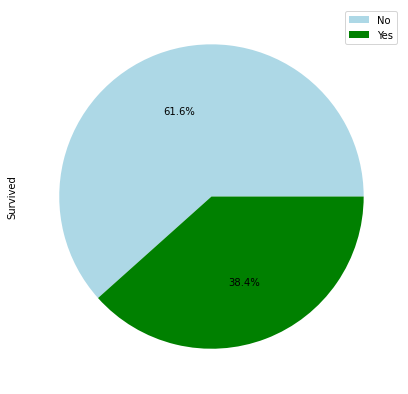

In [5]:
train_df.Survived.value_counts().plot.pie(colors = ['lightblue','Green'],
                                          legend='True',labeldistance=None,
                                         labels=['No','Yes'],
                                         figsize=(7,7),autopct='%1.1f%%')

Mirem supervivents primer per sexe, on tenim q dones i homes. Podem veure que la taxa de dones supervivents és de 74,2% i de homes de 18,8%.

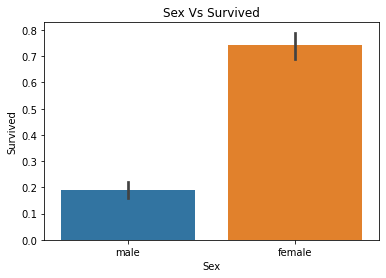

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [6]:
sns.barplot(data = train_df , x = 'Sex' , y = "Survived").set_title(f"{'Sex'} Vs Survived")
plt.show()
train_df[['Sex', "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(low=0.75,high=1)

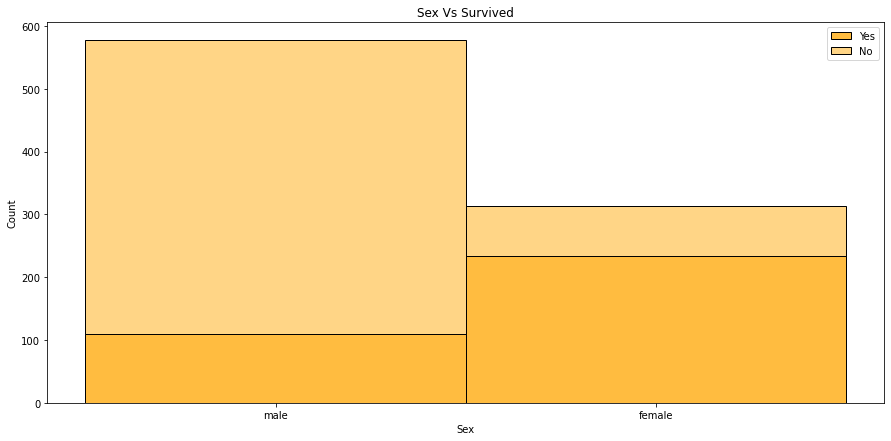

In [7]:
plt.figure(figsize = (15,7))
sns.histplot(data = train_df , x = 'Sex',
             hue = "Survived",binwidth=5,palette = sns.color_palette(["#ffc75e","#ffa600"])
             ,multiple = "stack").set_title(f"{'Sex'} Vs Survived")
plt.legend(['Yes','No'])
plt.show()

També mirem la supervivència segons la classe on es trobaven, i veiem que la gent que viatjava en primera classe un 69% d'aquesta va sobreviure, si viatjaven a segona classe van sobrevirue un 47% i de tercera classe un 24%

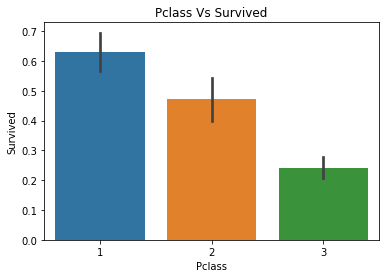

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
sns.barplot(data = train_df , x = 'Pclass' , y = "Survived").set_title(f"{'Pclass'} Vs Survived")
plt.show()
train_df[['Pclass', "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(low=0.75,high=1)

Podem veure també les proporcions de les classes dels passatgers al titanic. Observem que més de la meitat dels passatgers eren a la tercera classe i que les proporcions de la primera i segona classe es més o menys similar

<AxesSubplot:ylabel='Pclass'>

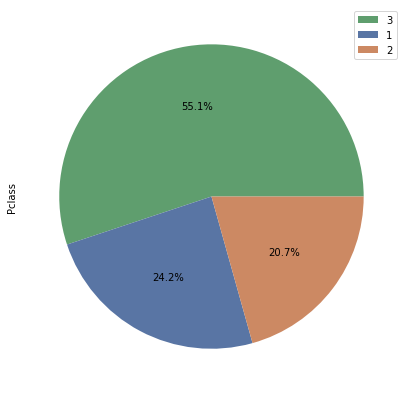

In [9]:
train_df.Pclass.value_counts().plot.pie(legend='True',labeldistance=None,
                                         figsize=(7,7),autopct='%1.1f%%',
                                       colors=["#5f9e6e","#5975a4","#cc8963"])

Mirem els supervivents per edat i sexe per veure si hi ha cap mena de relació

<AxesSubplot:title={'center':'Age histogram of the passengers'}, xlabel='Age of the passengers', ylabel='Count'>

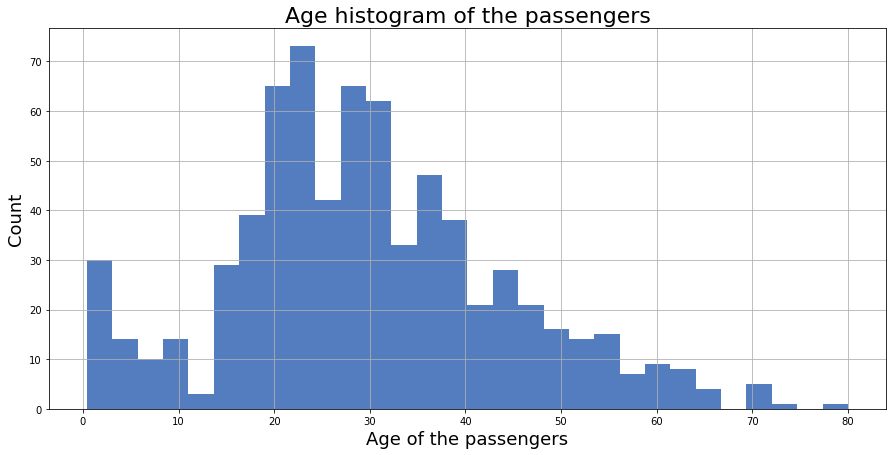

In [10]:
plt.xlabel("Age of the passengers",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Age histogram of the passengers",fontsize=22)
train_df['Age'].hist(bins=30,color='#285cb0',alpha=0.8,figsize=(15,7))

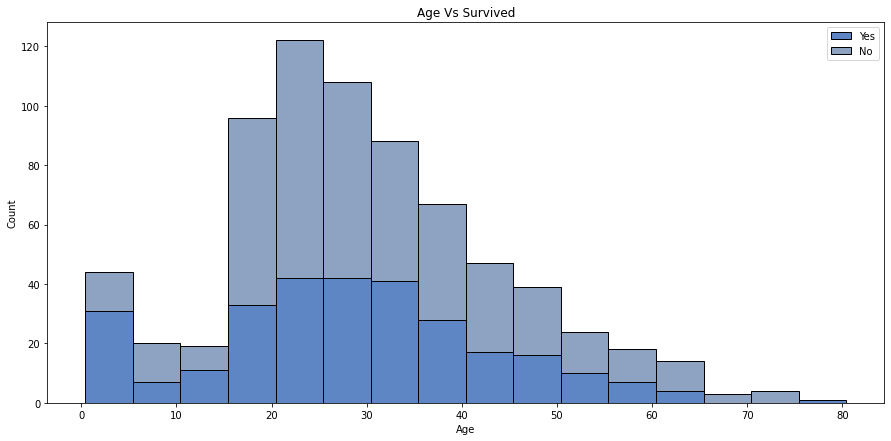

In [11]:
plt.figure(figsize = (15,7))
sns.histplot(data = train_df, x = 'Age',
             hue = "Survived",binwidth=5,palette = sns.color_palette(['#6883ad','#285cb0'])
             ,multiple = "stack" ).set_title(f"{'Age'} Vs Survived")
plt.legend(['Yes','No'])
plt.show()

També mirarem si el que van pagar pel bitllet la gent que estava al titanic te relació amb la seva supervivencia

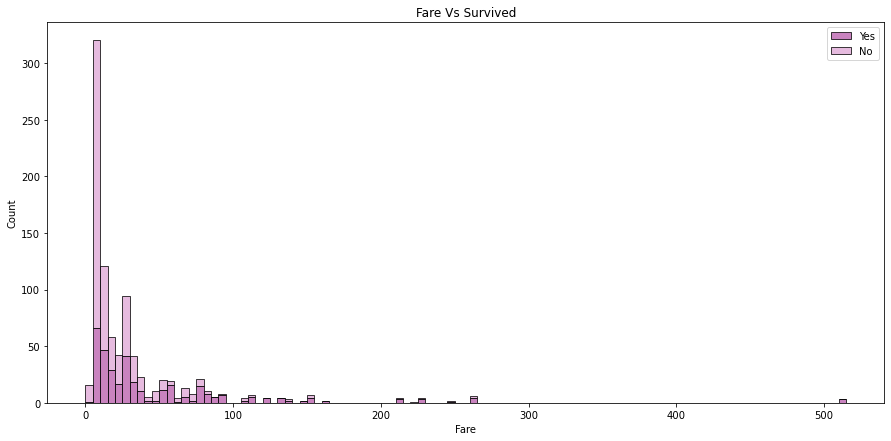

In [12]:
plt.figure(figsize = (15,7))
sns.histplot(data = train_df, x = 'Fare',
             hue = "Survived",binwidth=5,palette = sns.color_palette(['#dea4d5','#b85aaa'])
             ,multiple = "stack" ).set_title(f"{'Fare'} Vs Survived")
plt.legend(['Yes','No'])
plt.show()

A simple vista despres de mirar aquest gràfics podem extreure una mica d'informació:

* En proporció van sobreviure més dones que homes a l'enfonsament.


* De la `PClass` 1 comparat amb les altres dues classes va sobreviure un percentatge major de gent a l'accident.


* Segons l'edat dels passatgers veiem que la propocio de nadons, entre zero i cinc anys, i de joves d'entre quinze i vint,  va sobreviure una major proporció que la resta d'edats. Mentre que de la resta veiem la tendencia observada a la gràfica circular, aproximadament un terç sobreviu i la resta mor.


* En relació a la variable `Fare` veiem que molts dels passatgers que van gastar més en el bitllet van sorbeviure en major proporcio que els que van comprar els més econòmics, la diferencia es notable com podem apreciar a la gràfica i es poden apreciar outliers com ja s'ha comentat al inici.

### Correlació de les dades

<AxesSubplot:>

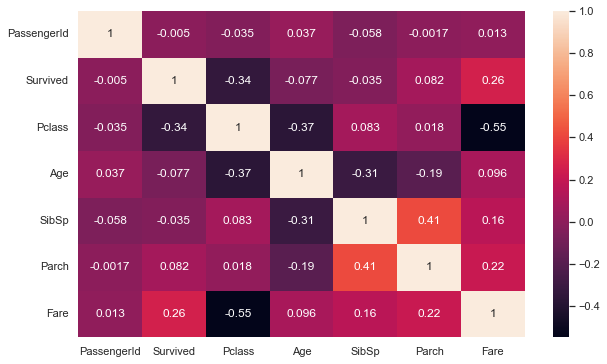

In [13]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(train_df.corr(), annot = True, fmt='.2g')

El que ens interessa es la correlació de les dades amb la variable objectiu `Survived`. Com podem veure la correlació és negativa amb les variables `PClass`, `Age`, `SibSp`, també amb `PassangerID` pero la correlació es molt pròxima a 0. Les variables `Parch` i `Fare` tenen correlació positiva tot i que la de `Parch` també es molt pròxima a 0.

# Preprocessing

Veiem que les nostres dades no estan normalitzades i que l'unica que sembla una normal es la variable `Age`. També podem veure que al tenir tantes variables categoriques no tindria massa sentit normalitzar aquestes, se'ls hi hauria de fer un one-hot. A les que son discretes, però no son categòriques mirarem més endevant si ens surt a compte normalitzar-les. La variable `Age` la normalitzarem i a la variable `Fare`  li aplicarem la transformació  $log(x+1)$

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

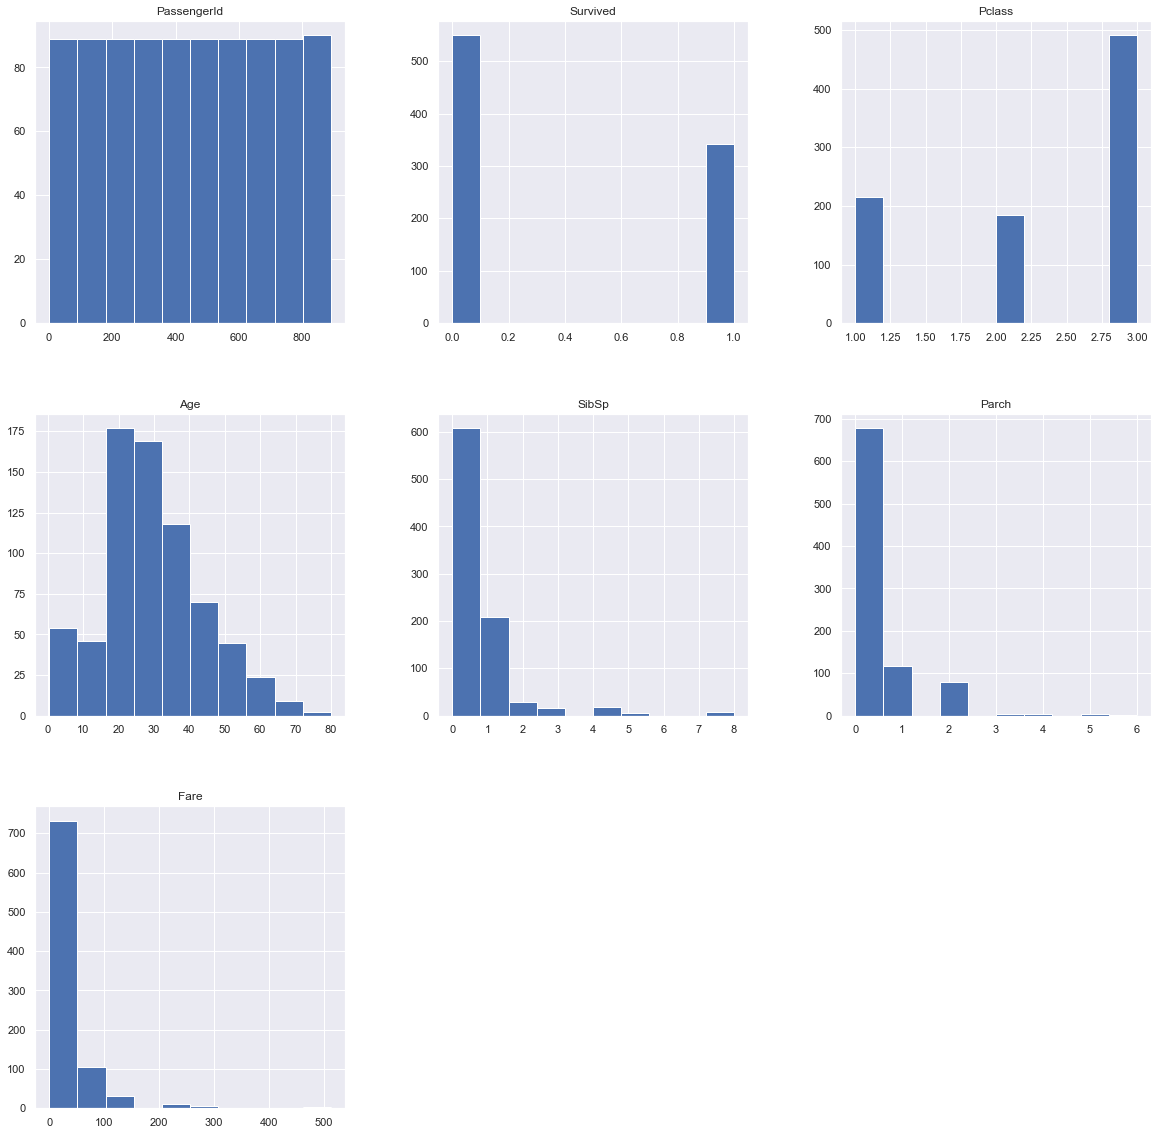

In [14]:
train_df.hist(figsize=(20,20))

### Eliminació de variables

Eliminem les variables que considerem que no seran necessaries o que no ens seran útils per la classificació, com les variables "PassengerId" i "Ticket"

In [15]:
train_df.drop(['PassengerId','Ticket'],axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [16]:
test_df.drop(['PassengerId','Ticket'],axis=1,inplace=True)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


### Tractament de nuls
Hem de realitzar un tractament de nuls per tenir les columnes amb totes les variables necessaries, per això omplirem la columna d'edat segons la classe on estan situats

In [17]:
f_class_Age=train_df.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)
a=list(f_class_Age['Age'])

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return a[0]

        elif Pclass == 2:
            return a[1]

        else:
            return a[2]

    else:
        return Age

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

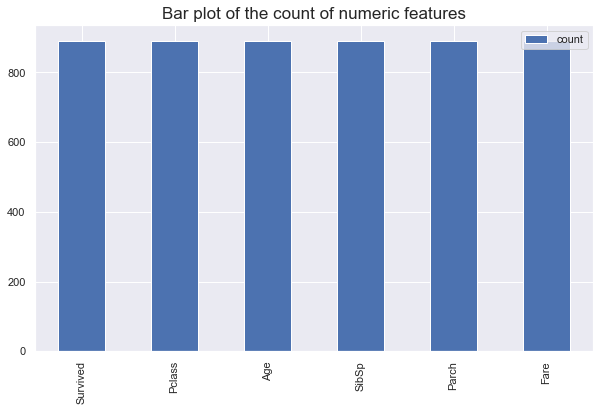

In [18]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)
d=train_df.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

In [19]:
train_df.drop('Cabin',axis=1,inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [20]:
test_df.drop('Cabin',axis=1,inplace=True)
test_df.dropna(inplace=True)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


Fem un clean de les dades per millorar el processament del dataframe

In [21]:
data_cleaner = [train_df, test_df]

In [22]:
for dataset in data_cleaner:    
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [23]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr


També transformarem la variable `Title` en valors discrets per després poder fer un one-hot

In [24]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data_cleaner:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [25]:
train_df.drop(['Name'], axis=1 , inplace = True)
test_df.drop(['Name'], axis=1 , inplace = True)    

In [26]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,male,22.0,1,0,7.2500,S,2,0,1.0
1,1,1,female,38.0,1,0,71.2833,C,2,0,3.0
2,1,3,female,26.0,0,0,7.9250,S,1,1,2.0
3,1,1,female,35.0,1,0,53.1000,S,2,0,3.0
4,0,3,male,35.0,0,0,8.0500,S,1,1,1.0


Comprovem que ja no tenim valors nuls al dataset

In [27]:
print(train_df.isnull().sum())
print("-" * 20)
print(test_df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64
--------------------
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64


In [28]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,male,22.0,1,0,7.2500,S,2,0,1.0
1,1,1,female,38.0,1,0,71.2833,C,2,0,3.0
2,1,3,female,26.0,0,0,7.9250,S,1,1,2.0
3,1,1,female,35.0,1,0,53.1000,S,2,0,3.0
4,0,3,male,35.0,0,0,8.0500,S,1,1,1.0


### One-Hot de les variables categoriques
Apliquem un one-hot encoder a les columnes: `Embarked`, `Sex`, `Title` i `Pclass` per així poder fer-les servir amb un impacte real i amb sentit a la classificació que farem posteriorment.

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore', dtype=int)
enc_df = pd.DataFrame(enc.fit_transform(train_df[['Embarked']]).toarray())
embark = enc_df.rename(columns={0:'C',1:'Q',2:'S'})
Title = pd.DataFrame(enc.fit_transform(train_df[['Title']]).toarray())
Title = Title.rename(columns={0:"None",1:"Mr",2:"Miss", 3:"Mrs", 4:"Master",5:"Rare"})
PClass = pd.DataFrame(enc.fit_transform(train_df[['Pclass']]).toarray())
PClass = PClass.rename(columns={0:1,1:2,2:3})
sex = pd.get_dummies(train_df['Sex'],drop_first=True)

train_df.drop(['Sex','Embarked','Title','Pclass'],axis=1,inplace=True)
train_df = pd.concat([train_df,sex,embark,Title,PClass],axis=1)
train_df.head()

## Apartat A

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
y_train = train_df["Survived"]
X_train = train_df.drop(labels = ["Survived"],axis = 1)
X_test = test_df

print(f"X_train shape is = {X_train.shape}" )
print(f"Y_train shape is = {Y_train.shape}" )
print(f"Test shape is = {Test.shape}" )

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
kfold = StratifiedKFold(n_splits=10)

In [ ]:
random_state = 2
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state, probability = True),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier(),
             GradientBoostingClassifier(random_state = random_state),
             ]

In [ ]:
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [0.1, 1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-4, 4, 20),
                    "penalty": ["l1","l2","none"]}

knn_param_grid = {"n_neighbors": np.linspace(2,20,12, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan","minkowski"],
                 "leaf_size": [1,3,5,12,30]}

gbc_param_grid = {
    "learning_rate": [0.05, 0.1, 0.2],
    "min_samples_split": [2,3,10],
    "min_samples_leaf": [1,3,10]
    }

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid,
                   gbc_param_grid]

In [ ]:
cv_result = []
best_estimators = []
mean_squared_errors = []
roc_auc_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

In [ ]:
for i in range(len(classifier)):
    print("---------------------------------------------------------------------------")
    clf = GridSearchCV(classifier[i],
                       param_grid=classifier_param[i],
                       cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2)
    
    clf.fit(X_train,y_train)
    
    cv_result.append(clf.best_score_)
    
    mean_squared_errors.append(mean_squared_error(y_test,clf.predict(X_test)))
    
    roc_auc_scores.append(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))
    
    recall_scores.append(recall_score(y_test, clf.predict(X_test), average='weighted'))
    
    precision_scores.append(precision_score(y_test, clf.predict(X_test), average='weighted'))
    
    f1_scores.append(f1_score(y_test, clf.predict(X_test), average='weighted'))
    
    best_estimators.append(clf.best_estimator_)
    
    print("Model: {}".format(classifier[i]))
    print("Accuracy: %{}".format(round(cv_result[i]*100,2)))
    print("MSE: {}".format(mean_squared_errors[i]))
    print("ROC AUC: {}".format(roc_auc_scores[i]))
    print("Recall: {}".format(recall_scores[i]))
    print("Precision: {}".format(precision_scores[i]))
    print("F1-Score: {}".format(f1_scores[i]))
    print("Best Estimator: {}".format(clf.best_estimator_))
    
print("---------------------------------------------------------------------------")